In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *
path_to_pool = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

### We look the MAP of all the runs in input and we order them

In [3]:
weights_dict={'n_BM25b0.75_0.res': 0.075, 'n_BB2c1.0_1.res': 0.0785, 'n_DPH_4.res': 0.0728, 'n_LemurTF_IDF_6.res': 0.0765, 'n_PL2c1.0_8.res': 0.069, 'n_DLH_3.res': 0.0743, 'n_TF_IDF_9.res': 0.0749, 'n_In_expB2c1.0_5.res': 0.0784, 'n_DFR_BM25c1.0_2.res': 0.0754, 'n_LGDc1.0_7.res': 0.0762}
import operator
sorted_w = sorted(weights_dict.items(), key=operator.itemgetter(1), reverse=True)
print sorted_w 


[('n_BB2c1.0_1.res', 0.0785), ('n_In_expB2c1.0_5.res', 0.0784), ('n_LemurTF_IDF_6.res', 0.0765), ('n_LGDc1.0_7.res', 0.0762), ('n_DFR_BM25c1.0_2.res', 0.0754), ('n_BM25b0.75_0.res', 0.075), ('n_TF_IDF_9.res', 0.0749), ('n_DLH_3.res', 0.0743), ('n_DPH_4.res', 0.0728), ('n_PL2c1.0_8.res', 0.069)]


### We execute Condorcet,Condorcet Weighted, Comb MNZ and Comb Median on a set of systems and we progressively increased the number of system used
We select progressively best k system

In [5]:
path = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\RankFusion"     
dir_in = "input"   
dir_w = "weights"       
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed=1156818)
combList="condorcet.txt","condorcetWeighted.txt",'comb_mnz.txt','comb_median.txt'
results={}
        

for i in range(1,len(filename_list)+1,1):
    print i
    
    repeat=1
        
    results[i]={"condorcet.txt":0,"condorcetWeighted.txt":0,'comb_mnz.txt':0,'comb_median.txt':0}
    for j in range(0,repeat,1):
        perm=[ sorted_w[k][0] for k in range(0,i) ]
        print "Ripetizione numero: "+str(j)
        #print perm
        #Calcolo condorcet e condercet_pesato
        condorcet_alg(perm, path, dir_norm, dir_comb)
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w)
        comb_mnz(perm, path, dir_norm, dir_comb)
        comb_median(perm, path, dir_norm, dir_comb)
        for filename in combList:
            MAP=take_MAP(path,dir_comb,dir_w,filename,False)#calcolo il MAP
            results[i][filename]+=MAP
    #calcolo media per i sistemi   
    for filename in combList:
        results[i][filename]=results[i][filename]/repeat
    #results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat

1
Ripetizione numero: 0
2
Ripetizione numero: 0
3
Ripetizione numero: 0
4
Ripetizione numero: 0
5
Ripetizione numero: 0
6
Ripetizione numero: 0
7
Ripetizione numero: 0
8
Ripetizione numero: 0
9
Ripetizione numero: 0
10
Ripetizione numero: 0


In [6]:
print results

{1: {'condorcet.txt': 0.128206654867, 'comb_median.txt': 0.128207430659, 'condorcetWeighted.txt': 0.128206654867, 'comb_mnz.txt': 0.128207430659}, 2: {'condorcet.txt': 0.128340929355, 'comb_median.txt': 0.128280166914, 'condorcetWeighted.txt': 0.128248598812, 'comb_mnz.txt': 0.128336118465}, 3: {'condorcet.txt': 0.128479957228, 'comb_median.txt': 0.128829508552, 'condorcetWeighted.txt': 0.128476481321, 'comb_mnz.txt': 0.129426730566}, 4: {'condorcet.txt': 0.129212116812, 'comb_median.txt': 0.103469804739, 'condorcetWeighted.txt': 0.128834037258, 'comb_mnz.txt': 0.132492446814}, 5: {'condorcet.txt': 0.129185768251, 'comb_median.txt': 0.101996559023, 'condorcetWeighted.txt': 0.12919365355, 'comb_mnz.txt': 0.131353832276}, 6: {'condorcet.txt': 0.128289844195, 'comb_median.txt': 0.125128380659, 'condorcetWeighted.txt': 0.128958040171, 'comb_mnz.txt': 0.13084611126}, 7: {'condorcet.txt': 0.12827039519, 'comb_median.txt': 0.12730309437, 'condorcetWeighted.txt': 0.128245349529, 'comb_mnz.txt'

In [8]:
keys=results.keys()
x=[]+keys
y1=[]
y2=[]
y3=[]
y4=[]

for i in range(1,len(keys)+1):
    y1.append(results[i]['condorcet.txt'])
    y2.append(results[i]['condorcetWeighted.txt'])
    y3.append(results[i]['comb_mnz.txt'])
    y4.append(results[i]['comb_median.txt'])

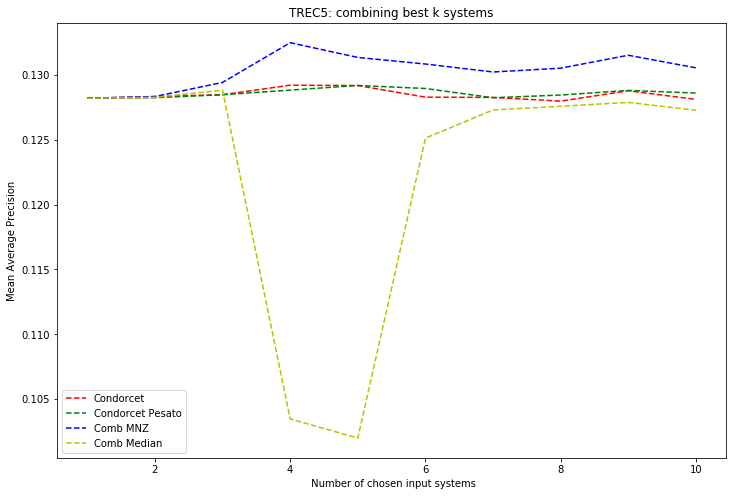

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]

plt.xlabel(' Number of chosen input systems')
plt.ylabel('Mean Average Precision')
plt.title('TREC5: combining best k systems')
plt.plot(x,y1,'r--',x,y2,'g--',x,y3,'b--',x,y4,'y--')
plt.legend(["Condorcet","Condorcet Pesato","Comb MNZ","Comb Median"])
plt.show()